In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns

In [2]:
# Load the dataset
file_path = r'C:\Users\valor\Downloads\Machine Learning Assignment\weatherAUS.csv'
df = pd.read_csv(file_path)

In [3]:
# Drop rows with missing values for simplicity
df = df.dropna()

In [4]:
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [5]:
# Define features and target variable
features = df.drop(['RainTomorrow', 'RainToday', 'Date', 'Location'], axis=1)
target = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [7]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [8]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

Accuracy: 0.8598901098901099
Precision: 0.7687277051129607
Recall: 0.5203219315895372
F1 Score: 0.6205903527717782
AUC-ROC Score: 0.7380561811601509


In [11]:
# Cross-validation
cv_scores = cross_val_score(rf_classifier, features, target, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", np.mean(cv_scores))

Cross-validation Scores: [0.84198866 0.84659695 0.83684864 0.86228288 0.85661113]
Mean Cross-validation Score: 0.8488656504785537


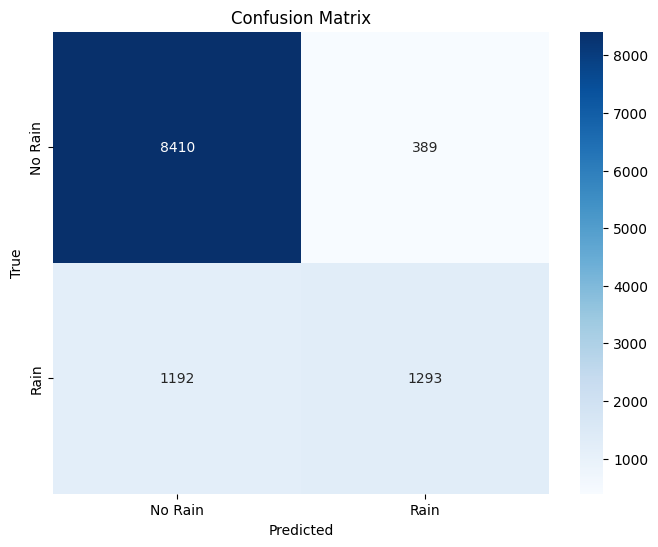

In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Save the plot as an image
plt.savefig('random_forest_confusion_matrix.png')

# Display the plot
plt.show()